# Schottky Calculator for Rare Earth Ions

Allen Scheie, scheie@jhu.edu

## Theory

In general, we can write the Schottky comtribution as $H = a' I_z + P\big(I_z^2 - \frac{1}{3}I(I+1)\big)$  (Bleaney, J. App. Phys., Vol. 34, No. 4 (1963), eq. 1),

where $a' = a \langle J \rangle$, $\langle J \rangle$ being the expectation value of $J$.
We calculate $a = \frac{aJ}{J}$, and we calculate $\langle J \rangle$ from the ordered moment:

$\mu_{eff} = g_J \sqrt{J(J+1)}$

$0 = J^2 + J - \big(\frac{\mu_{eff}}{g_J} \big)^2$

via the quadratic formula:

$\langle J \rangle = -\frac{1}{2} + \frac{1}{2}\sqrt{1 + 4\big(\frac{\mu_{eff}}{g_J} \big)^2} \quad$ (we take the plus sign because the negative solution is unphysical)

Thus, the Hamiltonian for the Schottky contribution is

$H = a \langle J \rangle I_z + P\big(I_z^2 - \frac{1}{3}I(I+1)\big)$

The $P$ term is generally three orders of magnetide smaller than the $aJ$ term (with the exceptions of Tb, Dy, and Yb), but we include it anyway.
With the Hamiltonian based mostly on $I_z$, it's really easy to diagonalize.

### Computing specific heat

We can write specific heat as 
$C/T = \frac{\partial S}{\partial T}$,

and we can write $S$ using the definition of free energy $dF = -SdT$ as $\quad S = -\frac{dF}{dT}$.

Now Free energy is $F = -k_B T \ln(Z)$, where 
$\quad Z=\sum_i e^{\frac{-E_i}{k_B T}} $. 

Putting all this together, we get

$$C/T = \frac{\partial S}{\partial T} = -\frac{\partial^2 F}{\partial T^2} = k_B \frac{\partial^2}{\partial T^2} T \ln(Z)$$ 
which is

$$C/T = k_B \big( \frac{\partial}{\partial T} \ln(Z) + T \frac{\partial^2}{\partial T^2} \ln(Z) \big)$$ 

Now $ \frac{\partial}{\partial T} \ln(Z) = \frac{1}{Z} \frac{\partial}{\partial T} Z = \frac{1}{Z}  \sum_i \frac{\partial}{\partial T} e^{\frac{-E_i}{k_B T}} =  \frac{1}{Z}  \sum_i \frac{E_i}{k_B T^2} e^{\frac{-E_i}{k_B T}}$

and $ T \frac{\partial^2}{\partial T^2} \ln(Z) = \frac{\partial}{\partial T}  \frac{1}{Z}  \sum_i \frac{E_i}{k_B T} e^{\frac{-E_i}{k_B T}} = 
- \frac{1}{Z}  \sum_i \frac{E_i}{k_B T^2} e^{\frac{-E_i}{k_B T}} -
\frac{1}{Z^2}  \sum_i \frac{E_i}{k_B^2 T^3} e^{\frac{-E_i}{k_B T}} \sum_j E_j e^{\frac{-E_j}{k_B T}}+ 
\frac{1}{Z}  \sum_i \frac{E_i^2}{k_B^2 T^3} e^{\frac{-E_i}{k_B T}}
$

After some algebra, the result is

$$C = \frac{1}{Z k_B T^2} \Big[
\sum_i E_i^2 e^{\frac{-E_i}{k_B T}} -
\frac{1}{Z} \big( \sum_i E_i e^{\frac{-E_i}{k_B T}} \big)^2
\Big]$$

So the trick is finding the eigenvalues $E_i$ for a given Hamiltonian. From there, we can compute heat capacity.

## Note on the units in Bleaney (1963)

Bleany's Hyperfine interaction constants (Table I) are in Mc/s. This is an outdated unit, but it means Megacycle per second. I.E., $10^6{\rm s^{-1}}$. We want the Hamiltonian to be in units of meV, so $a$ and $P$ need to be in units of energy. We convert frequency to energy using Planck's formula $E=hf$.

In [1]:
# import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from PyNuclearSchottky import NuclearSchottky

#Plot Formatting stuff
plt.rcParams.update({'text.usetex': False, 'mathtext.fontset': 'stixsans', 'font.size': 15})

[[171, 0.5, 3100.0, 0.0], [173, 2.5, -850.0, -146.0]]
[0.1409, 0.16103]


<IPython.core.display.Javascript object>


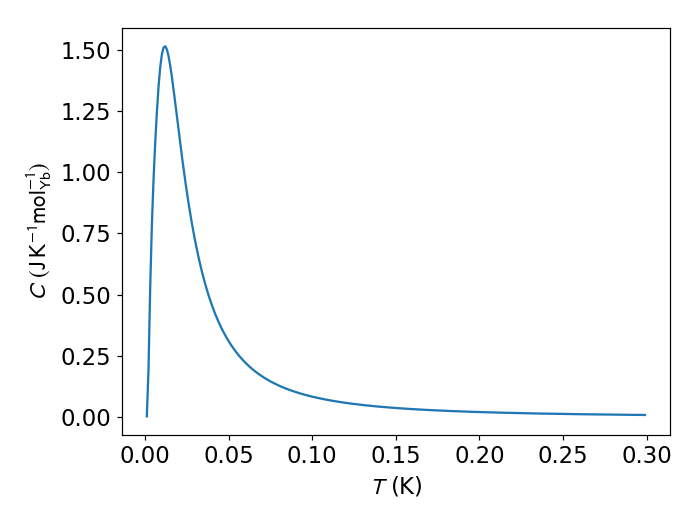

In [2]:
# Initialize nuclear schottky class with a Yb3+ ion
NS = NuclearSchottky('Yb3+')
# Print isotope numbers, spin quantum numbers, and hyperfine coupling constants
print(NS.Isotopes)
print(NS.IsotopeComposition)
# Calculate the nuclear schottky anomaly for the following temperature array
# and an ordered electronic moment of 0.9 muB
Tarray = np.arange(0.001,0.3,0.001)
NS.HeatCapacity(1.5, Tarray)

# Plot results
plt.figure()
plt.plot(NS.T, NS.HC)
plt.ylabel("$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$")
plt.xlabel('$T$ (K)')
plt.tight_layout()

## Addition of quadrupole moment
For some ions (like Yb3+) there is significant coupling between the nuclear spin and the electronic quadupole moment. In cases where there is a quadrupolar field, the nuclear Schottky anomaly can be calculated as follows:

<IPython.core.display.Javascript object>


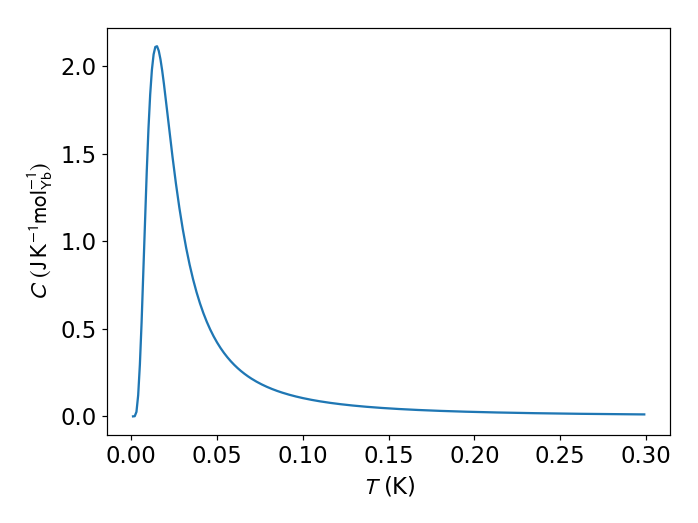

In [3]:
NS.HeatCapacity(1.5, Tarray, quadrupolemoment = 0.5)

# Plot results
plt.figure()
plt.plot(NS.T, NS.HC)
plt.ylabel("$C$ $(\\rm{J\> K^{-1} mol^{-1}_{Yb}})$")
plt.xlabel('$T$ (K)')
plt.tight_layout()

# Simple two-level Schottky anomaly

If you want to compute a Schottky anomaly without all the hyperfine coupling constants and isotopic compositions, there is a function called "TwoLevelHeatCapacity" which computes a Schottky anomaly of a two-level system based purely off of energy splitting.

<IPython.core.display.Javascript object>


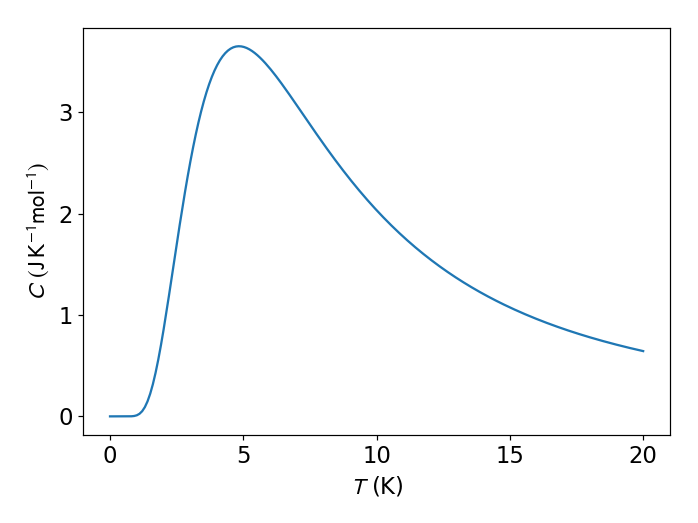

In [4]:
from PyNuclearSchottky import TwoLevelHeatCapacity

TT = np.linspace(0.0001, 20, 200)
# calculate Schottky anomaly of an energy split of 1 meV
TwoLevelHC = TwoLevelHeatCapacity(splitting=1, Tarray=TT)  

# Plot results
plt.figure()
plt.plot(TT, TwoLevelHC)
plt.ylabel("$C$ $(\\rm{J\> K^{-1} mol^{-1}})$")
plt.xlabel('$T$ (K)')
plt.tight_layout()